# Artificial Intel & Heurist Prg - Project 3

In [91]:
import tkinter as tk
from tkinter import messagebox

In [92]:
class HexapawnAI:
    def __init__(self):
        self.AI_PLAYER = "b"
        self.HUMAN_PLAYER = "w"

    # Terminal state evaluation
    def check_winner(self, board: "HexapawnBoard", player_to_move: str):
        b = board.board
        size = board.size

        # Promotion wins
        if "w" in b[0]:
            return "w"
        if "b" in b[size - 1]:
            return "b"

        # Stalemate: player to move loses
        if not board.get_legal_moves(player_to_move):
            return self.AI_PLAYER if player_to_move == self.HUMAN_PLAYER else self.HUMAN_PLAYER

        return None  # no winner yet

    # Minimax search (depth-aware so it prefers faster wins)
    def minimax(self, board, maximizing, alpha=-999, beta=999, depth=0):
        player_to_move = self.AI_PLAYER if maximizing else self.HUMAN_PLAYER
        winner = self.check_winner(board, player_to_move)

        if winner == self.AI_PLAYER:
            return 10 - depth, None
        if winner == self.HUMAN_PLAYER:
            return depth - 10, None

        moves = board.get_legal_moves(player_to_move)

        if maximizing:
            best_score = -999
            best_move = None

            for move in moves:
                new_board = board.clone()
                new_board.make_move(move)

                score, _ = self.minimax(
                    new_board, False, alpha, beta, depth + 1
                )

                if score > best_score:
                    best_score = score
                    best_move = move

                alpha = max(alpha, score)
                if beta <= alpha:
                    break

            return best_score, best_move

        else:
            best_score = 999
            best_move = None

            for move in moves:
                new_board = board.clone()
                new_board.make_move(move)

                score, _ = self.minimax(
                    new_board, True, alpha, beta, depth + 1
                )

                if score < best_score:
                    best_score = score
                    best_move = move

                beta = min(beta, score)
                if beta <= alpha:
                    break

            return best_score, best_move

    # choose best move
    def get_best_move(self, board: "HexapawnBoard"):
        _, move = self.minimax(board, maximizing=True, depth=0)
        return move


In [93]:
# Hexapawn Board Template
# Simple and smart starting point for a 3x3 hexapawn game board.

class HexapawnBoard:
    def __init__(self):
        # "w" = white pawn, "b" = black pawn, "." = empty
        self.size = 4
        self.board = [
            ["b", "b", "b", "b"],
            [".", ".", ".", "."],
            [".", ".", ".", "."],
            ["w", "w", "w", "w"],
        ]

    def display(self):
        print("    A B C D")
        for r in range(self.size):
            row_label = str(self.size - r)
            row_str = " ".join(self.board[r][c] for c in range(self.size))
            print(f"{row_label}   {row_str}")
        print()

    def clone(self):
        # Helpful for AI search trees
        new_board = HexapawnBoard()
        new_board.board = [row[:] for row in self.board]
        return new_board

    def get_legal_moves(self, player):
        """
        Returns a list of moves for the given player.
        A move is represented as: (from_row, from_col, to_row, to_col)
        """
        moves = []
        direction = -1 if player == "w" else 1  # white moves up, black moves down

        for r in range(self.size):
            for c in range(self.size):
                if self.board[r][c] != player:
                    continue

                nr = r + direction  # next row in forward direction

                if 0 <= nr < self.size:
                    # Forward
                    if self.board[nr][c] == ".":
                        moves.append((r, c, nr, c))

                    # Capture left
                    if c - 1 >= 0:
                        if self.board[nr][c - 1] != "." and self.board[nr][c - 1] != player:
                            moves.append((r, c, nr, c - 1))

                    # Capture right
                    if c + 1 < self.size:
                        if self.board[nr][c + 1] != "." and self.board[nr][c + 1] != player:
                            moves.append((r, c, nr, c + 1))

        return moves

    def make_move(self, move):
        # Placeholder: apply (from_row, from_col, to_row, to_col)
        (fr, fc, tr, tc) = move
        self.board[tr][tc] = self.board[fr][fc]
        self.board[fr][fc] = "."

def index_to_coord(r, c):
    col = chr(ord('A') + c)     # 0 → 'a', 1 → 'b', ...
    row = str(4 - r)            # 0 → 4, 3 → 1
    return col + row

def coord_to_index(coord):
    col = ord(coord[0].lower()) - ord('A')
    row = 4 - int(coord[1])
    return row, col

# def get_human_move(board):
#     moves = board.get_legal_moves("w")

#     print("Your legal moves:")
#     for i, m in enumerate(moves, 1):
#         fr, fc, tr, tc = m
#         print(f"{i}: {index_to_coord(fr, fc)} → {index_to_coord(tr, tc)}")

#     while True:
#         choice = input(f"Choose move (1-{len(moves)}): ").strip()
#         if choice.isdigit():
#             choice = int(choice)
#             if 1 <= choice <= len(moves):
#                 return moves[choice - 1]
#         print("Invalid choice. Try again.")

# if __name__ == "__main__":
#     board = HexapawnBoard()
#     ai = HexapawnAI()

#     while True:
#         board.display()

#         # Human move
#         human_move = get_human_move(board)
#         board.make_move(human_move)

#         # Check winner
#         winner = ai.check_winner(board, player_to_move="b")
#         if winner:
#             board.display()
#             print("Winner:", winner)
#             break

#         # AI move
#         ai_move = ai.get_best_move(board)
#         print("AI moves:", ai_move)
#         board.make_move(ai_move)

#         # Check winner
#         winner = ai.check_winner(board, player_to_move="w")
#         if winner:
#             board.display()
#             print("Winner:", winner)
#             break


In [94]:
class HexapawnGUI:
    def __init__(self):
        self.board = HexapawnBoard()
        self.ai = HexapawnAI()

        self.selected = None
        self.valid_targets = []

        self.root = tk.Tk()
        self.root.title("Hexapawn")

        self.buttons = [[None]*4 for _ in range(4)]

        for r in range(4):
            for c in range(4):
                btn = tk.Button(
                    self.root,
                    width=6,
                    height=3,
                    font=("Courier", 28),
                    command=lambda r=r, c=c: self.on_click(r, c)
                )
                btn.grid(row=r, column=c)
                self.buttons[r][c] = btn

        replay_btn = tk.Button(
            self.root,
            text="Replay",
            font=("Courier", 14),
            command=self.reset_game
        )
        replay_btn.grid(row=4, column=0, columnspan=4, sticky="we")

        self.update_display()
        self.root.mainloop()

    def update_display(self):
        for r in range(4):
            for c in range(4):
                piece = self.board.board[r][c]

                if piece == "w":
                    text = "♙"
                elif piece == "b":
                    text = "♟"
                else:
                    text = ""

                base_color = "burlywood" if (r + c) % 2 == 0 else "saddlebrown"
                self.buttons[r][c].config(text=text, bg=base_color)

        for r, c in self.valid_targets:
            self.buttons[r][c].config(bg="lightgreen")

        if self.selected:
            r, c = self.selected
            self.buttons[r][c].config(bg="lightblue")

    def on_click(self, r, c):
        if self.selected:
            if (r, c) in self.valid_targets:
                self.board.make_move((*self.selected, r, c))
                self.selected = None
                self.valid_targets = []
                self.update_display()
                self.after_human()
                return
            else:
                self.selected = None
                self.valid_targets = []
                self.update_display()

        if self.board.board[r][c] == "w":
            self.selected = (r, c)
            self.valid_targets = [
                (tr, tc)
                for fr, fc, tr, tc in self.board.get_legal_moves("w")
                if (fr, fc) == (r, c)
            ]
            self.update_display()

    def after_human(self):
        winner = self.ai.check_winner(self.board, "w")
        if winner:
            messagebox.showinfo("Game Over", f"Winner: {self.winner_name(winner)}")
            self.reset_game()
            return

        ai_move = self.ai.get_best_move(self.board)
        if ai_move:
            self.board.make_move(ai_move)

        self.update_display()

        winner = self.ai.check_winner(self.board, "w")
        if winner:
            messagebox.showinfo("Game Over", f"Winner: {self.winner_name(winner)}")
            self.reset_game()

    def winner_name(self, winner):
        return "White" if winner == "w" else "Black"

    def reset_game(self):
        self.board = HexapawnBoard()
        self.selected = None
        self.valid_targets = []
        self.update_display()


In [95]:
# Q-learning Hexapawn Agent
# Learns purely from self-play

import random
from collections import defaultdict

class HexapawnQLearningAI:
    def __init__(self, alpha=0.2, gamma=0.9, epsilon=0.2, epsilon_min=0.05, decay=0.999):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.decay = decay
        self.Q = defaultdict(lambda: defaultdict(float))
        self.PLAYER = "b"

    def decay_epsilon(self):
        self.epsilon = max(self.epsilon_min, self.epsilon * self.decay)


    def get_state(self, board):
        # Board state represented as tuple of tuples (hashable)
        return tuple(tuple(row) for row in board.board)

    def choose_action(self, board):
        state = self.get_state(board)
        actions = board.get_legal_moves(self.PLAYER)

        if not actions:
            return None

        # ε-greedy
        if random.random() < self.epsilon:
            return random.choice(actions)

        # exploitation
        q_vals = self.Q[state]
        return max(actions, key=lambda a: q_vals[a])

    def update(self, state, action, reward, next_state, next_actions):
        current_q = self.Q[state][action]

        if next_actions:
            max_next_q = max(self.Q[next_state][a] for a in next_actions)
        else:
            max_next_q = 0

        # Q-learning update
        self.Q[state][action] = current_q + self.alpha * (
            reward + self.gamma * max_next_q - current_q
        )


In [96]:
def train_self_play(episodes=5000):
    agent = HexapawnQLearningAI()
    wins = {"b": 0, "w": 0}

    for _ in range(episodes):
        board = HexapawnBoard()
        history = []
        current_player = "b"

        while True:
            agent.PLAYER = current_player
            state = agent.get_state(board)
            action = agent.choose_action(board)

            if action is None:
                winner = "w" if current_player == "b" else "b"
                break

            board.make_move(action)
            history.append((state, action, current_player))

            winner = HexapawnAI().check_winner(board, current_player)
            if winner:
                break

            current_player = "w" if current_player == "b" else "b"

        for i, (state, action, player) in enumerate(history):
            reward = 1 if player == winner else -1

            if i + 1 < len(history):
                next_state = history[i + 1][0]
                next_actions = board.get_legal_moves(player)
            else:
                next_state = agent.get_state(board)
                next_actions = []

            agent.PLAYER = player
            agent.update(state, action, reward, next_state, next_actions)

        agent.decay_epsilon()

        wins[winner] += 1

    return agent, wins


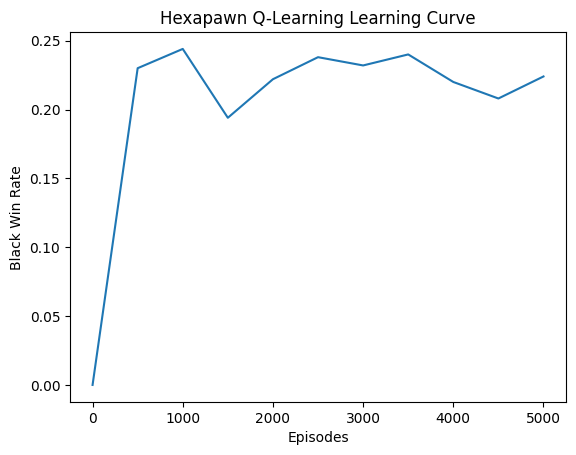

In [97]:
import matplotlib.pyplot as plt

wins_over_time = []
checkpoints = range(0, 5001, 500)

trained = 0
agent = None

for ep in checkpoints:
    episodes_to_train = ep - trained

    if episodes_to_train > 0:
        agent, wins = train_self_play(episodes_to_train)
        trained = ep

        total = wins["b"] + wins["w"]
        win_rate = wins["b"] / total
    else:
        win_rate = 0.0  # no training yet

    wins_over_time.append(win_rate)

plt.plot(checkpoints, wins_over_time)
plt.xlabel("Episodes")
plt.ylabel("Black Win Rate")
plt.title("Hexapawn Q-Learning Learning Curve")
plt.show()


In [98]:
def evaluate_vs_minimax(agent, games=100):
    minimax = HexapawnAI()
    ql_wins = 0

    for _ in range(games):
        board = HexapawnBoard()

        while True:
            agent.PLAYER = "b"
            old_epsilon = agent.epsilon
            agent.epsilon = 0.0

            move = agent.choose_action(board)
            agent.epsilon = old_epsilon

            if move is None:
                break

            board.make_move(move)

            if minimax.check_winner(board, "b"):
                ql_wins += 1
                break

            move = minimax.get_best_move(board)
            board.make_move(move)

            if minimax.check_winner(board, "w"):
                break

    win_rate = ql_wins / games
    print(f"Q-learning win rate vs Minimax: {win_rate:.2f}")
    return win_rate

In [99]:
evaluate_vs_minimax(agent)

Q-learning win rate vs Minimax: 0.00


0.0

In [100]:
HexapawnGUI()